# Data Visualization
### Kanja Saha



In [8]:
#import necessary libraries
import numpy as np
import pandas as pd
from IPython.display import display

# Load the dataset into pandas dataframe
item_to_id = pd.read_csv("item_to_id.csv")
display ("Dataset has {} rows(samples) with {} columns(features) each.".format(*item_to_id.shape))

purchase_history = pd.read_csv("purchase_history.csv")
display ("Dataset has {} rows(samples) with {} columns(features) each.".format(*purchase_history.shape))
purchase_history.head()

'Dataset has 48 rows(samples) with 2 columns(features) each.'

'Dataset has 39474 rows(samples) with 2 columns(features) each.'

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [34]:
purchase_history_sample=purchase_history.sample(3)

#purchase_history_sample_dv=purchase_history_sample[["user_id"]].join(purchase_history_sample["id"].str.get_dummies(',').replace('',0))
purchase_history_sample_dv=purchase_history_sample["id"].str.get_dummies(',').replace('',0)
purchase_history_sample_dv.head()
purchase_history_sample_dv.corr()

,1,11,20,23,25,28,32,36,37,39,41,46,47,48,5
1162,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
10107,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
35926,1,1,1,0,1,1,1,1,0,1,1,0,0,1,1


In [35]:
purchase_history_sample_dv.corr()

,1,11,20,23,25,28,32,36,37,39,41,46,47,48,5
1,1.0,1.0,1.0,-0.5,1.0,1.0,1.0,1.0,-0.5,1.0,1.0,-1.0,-0.5,1.0,1.0
11,1.0,1.0,1.0,-0.5,1.0,1.0,1.0,1.0,-0.5,1.0,1.0,-1.0,-0.5,1.0,1.0
20,1.0,1.0,1.0,-0.5,1.0,1.0,1.0,1.0,-0.5,1.0,1.0,-1.0,-0.5,1.0,1.0
23,-0.5,-0.5,-0.5,1.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,1.0,-0.5,-0.5
25,1.0,1.0,1.0,-0.5,1.0,1.0,1.0,1.0,-0.5,1.0,1.0,-1.0,-0.5,1.0,1.0
28,1.0,1.0,1.0,-0.5,1.0,1.0,1.0,1.0,-0.5,1.0,1.0,-1.0,-0.5,1.0,1.0
32,1.0,1.0,1.0,-0.5,1.0,1.0,1.0,1.0,-0.5,1.0,1.0,-1.0,-0.5,1.0,1.0
36,1.0,1.0,1.0,-0.5,1.0,1.0,1.0,1.0,-0.5,1.0,1.0,-1.0,-0.5,1.0,1.0
37,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,1.0,-0.5,-0.5,0.5,-0.5,-0.5,-0.5
39,1.0,1.0,1.0,-0.5,1.0,1.0,1.0,1.0,-0.5,1.0,1.0,-1.0,-0.5,1.0,1.0


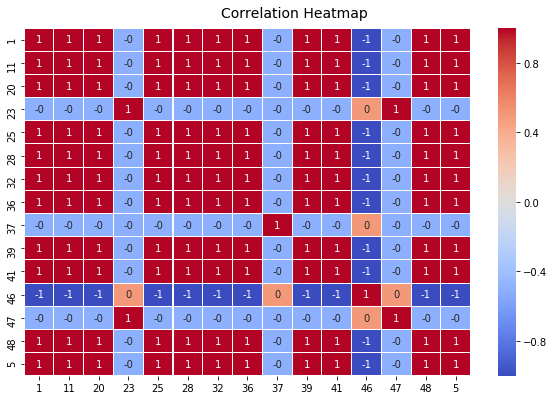

In [36]:
# Correlation Matrix Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(figsize=(10, 6))
corr = purchase_history_sample_dv.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.0f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

In [2]:
#summary of dataset's distribution
import numpy as np
raw_data['CustomerID'] = raw_data['CustomerID'].astype(np.int64)
raw_data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [3]:
#items with negative quantity implies returned items, and 0 implies no purchase
raw_data[raw_data.Quantity<=0].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [4]:
import preprocess_data as o
data,outliers,message=o.remove_outliers(data,False)
print (message)

783 (17.91%) data points considered outliers from the dataset of 4372. Outlier not dropped from dataset.


C:\Users\kanja\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  import sys


,Recency,duration,purchase_amount,purchase_count,return_amount,return_count
Recency,1.000000,-0.515551,-0.206396,-0.142514,-0.142514,-0.142514
duration,-0.515551,1.000000,0.325911,0.273360,0.273360,0.273360
purchase_amount,-0.206396,0.325911,1.000000,0.589868,0.589868,0.589868
purchase_count,-0.142514,0.273360,0.589868,1.000000,1.000000,1.000000
return_amount,-0.142514,0.273360,0.589868,1.000000,1.000000,1.000000
return_count,-0.142514,0.273360,0.589868,1.000000,1.000000,1.000000


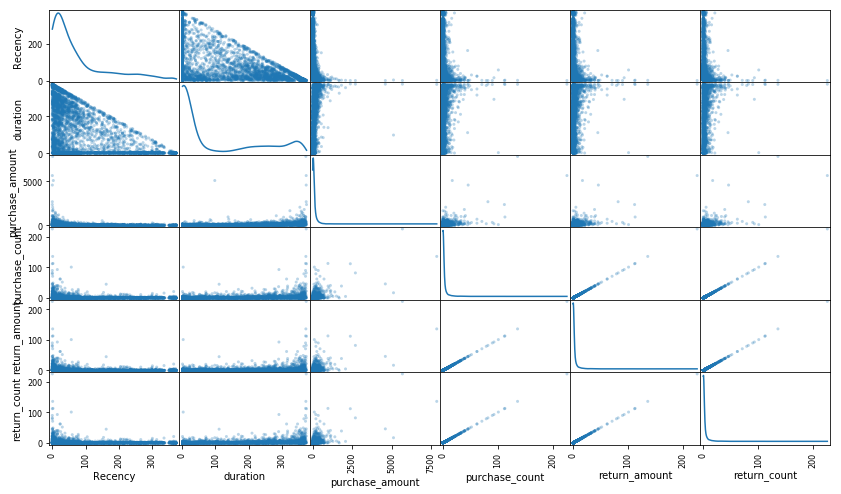

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

data.corr()

In [6]:
import preprocess_data as o
data,outliers,message=o.remove_outliers(data,True)
print (message)

783 (17.91%) data points considered outliers from the dataset of 4372. Outlier Dropped from dataset.


C:\Users\kanja\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


,Recency,duration,purchase_amount,purchase_count,return_amount,return_count
Recency,1.000000,-0.471476,-0.308277,-0.126389,-0.126389,-0.126389
duration,-0.471476,1.000000,0.481511,0.284941,0.284941,0.284941
purchase_amount,-0.308277,0.481511,1.000000,0.158009,0.158009,0.158009
purchase_count,-0.126389,0.284941,0.158009,1.000000,1.000000,1.000000
return_amount,-0.126389,0.284941,0.158009,1.000000,1.000000,1.000000
return_count,-0.126389,0.284941,0.158009,1.000000,1.000000,1.000000


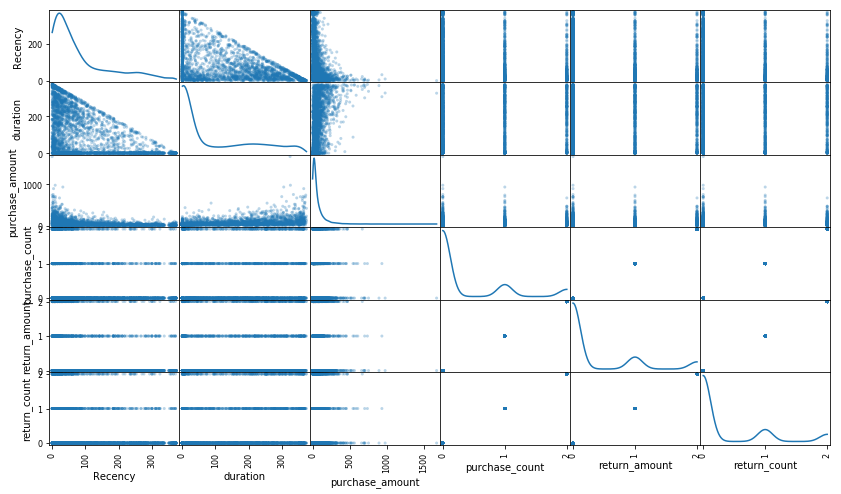

In [7]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

data.corr()

In [8]:
#NORMALIZE DATA 
import preprocess_data as o
n_data=o.normalize_data(data)
#print (message)
n_data.head(5)
n_data.describe()

,Recency,duration,purchase_amount,purchase_count,return_amount,return_count
count,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000
mean,0.543614,0.446827,0.316825,0.001771,0.001771,0.001771
std,0.400809,0.410461,0.274490,0.005307,0.005307,0.005307
min,0.000000,0.002613,0.000000,0.000000,0.000000,0.000000
25%,0.113127,0.012418,0.089006,0.000000,0.000000,0.000000
50%,0.563507,0.423086,0.234316,0.000000,0.000000,0.000000
75%,0.984465,0.889010,0.489816,0.000000,0.000000,0.000000
max,0.999993,0.999924,0.999831,0.098414,0.098414,0.098414


C:\Users\kanja\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


,Recency,duration,purchase_amount,purchase_count,return_amount,return_count
Recency,1.000000,-0.832028,-0.477009,-0.082992,-0.082992,-0.082992
duration,-0.832028,1.000000,0.041033,0.100074,0.100074,0.100074
purchase_amount,-0.477009,0.041033,1.000000,0.083418,0.083418,0.083418
purchase_count,-0.082992,0.100074,0.083418,1.000000,1.000000,1.000000
return_amount,-0.082992,0.100074,0.083418,1.000000,1.000000,1.000000
return_count,-0.082992,0.100074,0.083418,1.000000,1.000000,1.000000


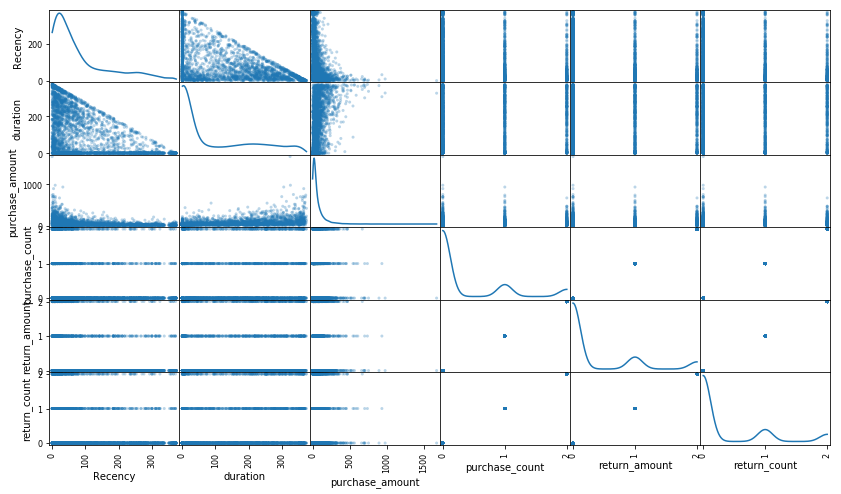

In [9]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

n_data.corr()

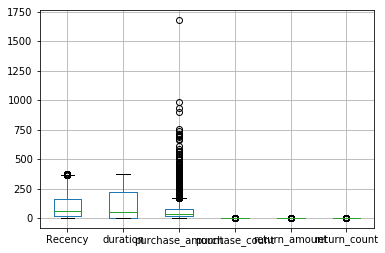

In [10]:
import matplotlib.pyplot as plt

data.boxplot()

,Recency,duration,purchase_amount,purchase_count,return_amount,return_count
count,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000
mean,99.765673,111.954583,62.492895,0.308721,0.308721,0.308721
std,102.634769,124.471361,89.442098,0.617908,0.617908,0.617908
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,14.000000,0.000000,0.000000,0.000000
50%,58.000000,53.000000,33.000000,0.000000,0.000000,0.000000
75%,158.000000,219.000000,75.000000,0.000000,0.000000,0.000000
max,373.000000,373.000000,1677.000000,2.000000,2.000000,2.000000


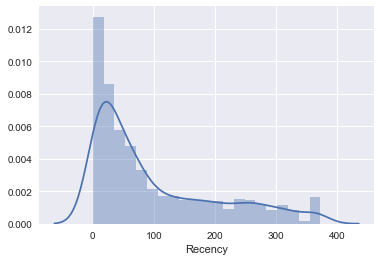

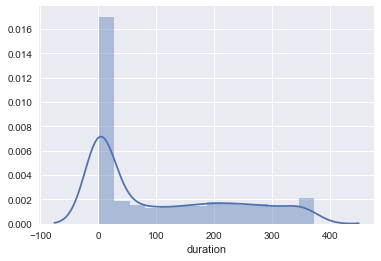

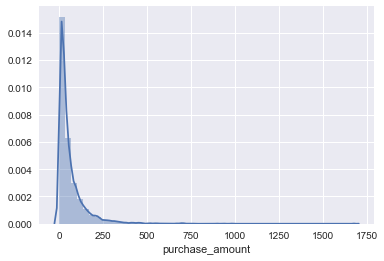

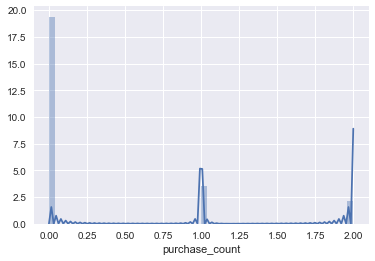

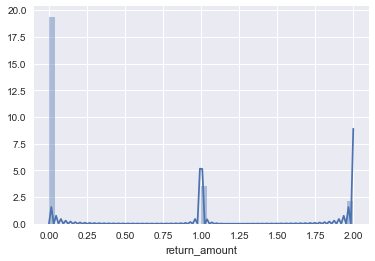

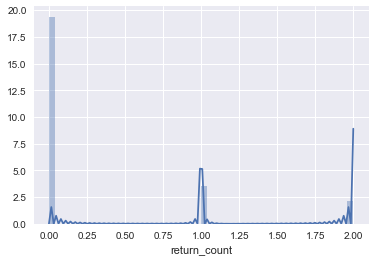

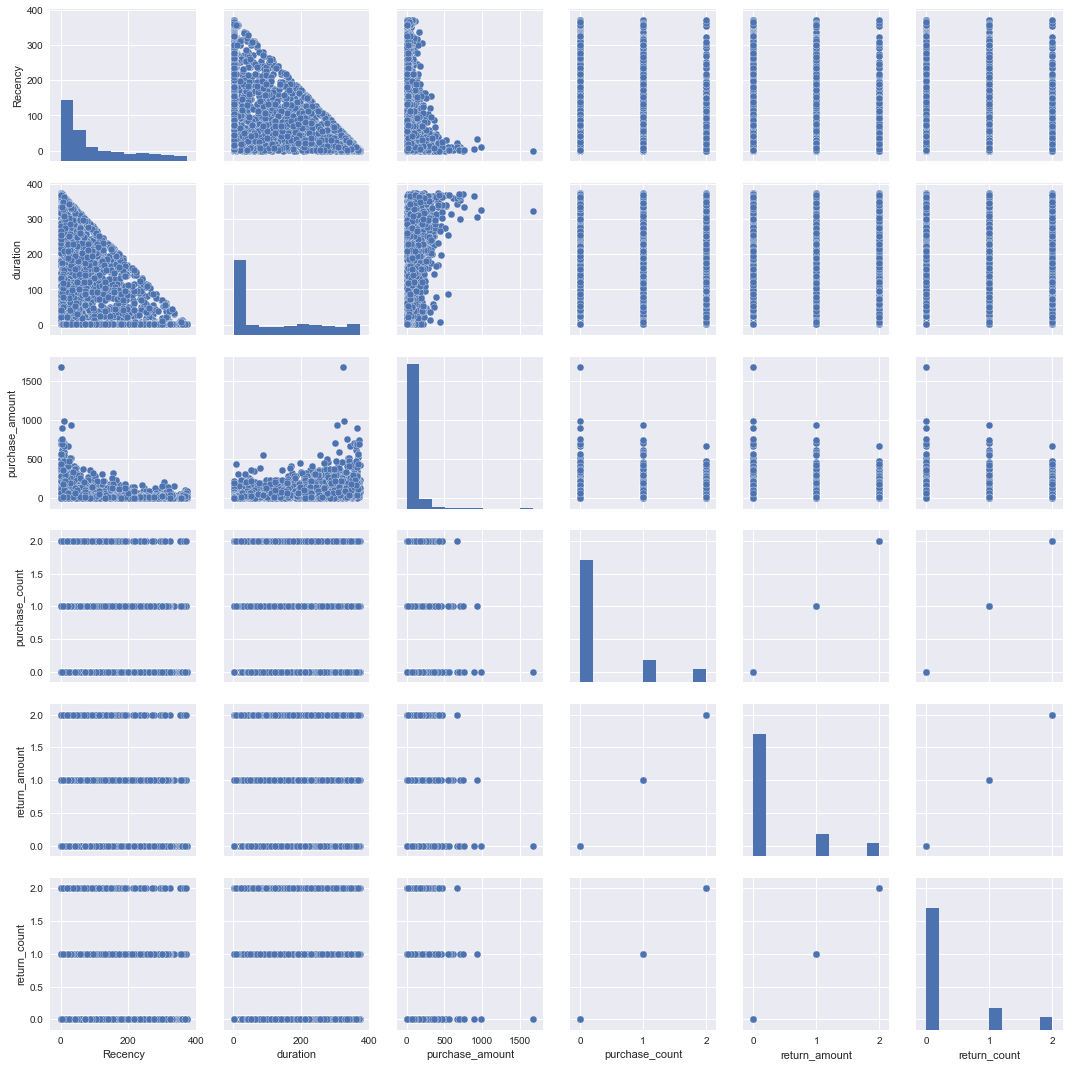

In [11]:
# Display a description of the dataset
display(data.describe())

import seaborn as sns
sns.set(color_codes=True)
products=list(data.columns.values)
for  x in products:
    plt.figure(x)
    sns.distplot(data[x]);
sns.pairplot(data);

In [12]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
    
for  x in products:
    
    new_data = data.drop([x], axis = 1, inplace = False)
    target = data[x]

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=12)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train);

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    print('Score for ''\033[1m'' {} ''\033[0m'' as target feature: ''\033[1m'' {} ''\033[0m'''.format(x,score))


Score for  Recency  as target feature:  -0.028629875932353114 
Score for  duration  as target feature:  -0.19664841538275235 
Score for  purchase_amount  as target feature:  -0.680510962733879 
Score for  purchase_count  as target feature:  1.0 
Score for  return_amount  as target feature:  1.0 
Score for  return_count  as target feature:  1.0 


Dimension 1    0.7625
Dimension 2    0.9791
Dimension 3    0.9998
Dimension 4    1.0000
Dimension 5    1.0000
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


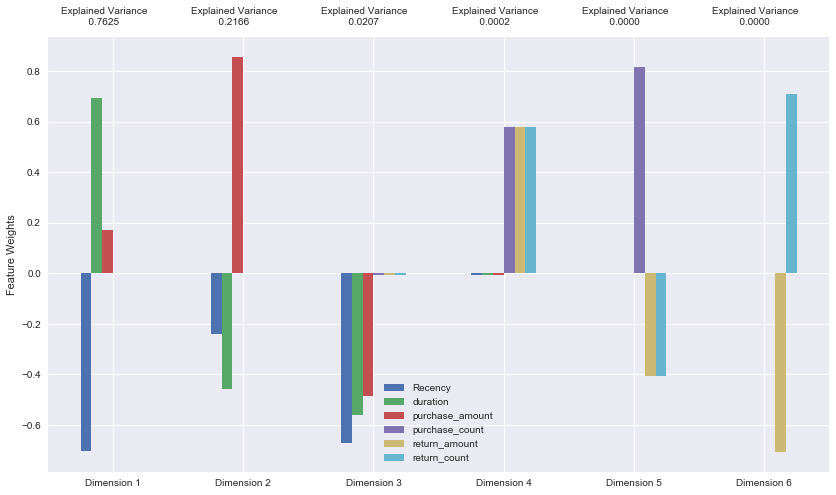

In [13]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
import visuals as vs
good_data=n_data
from sklearn.decomposition import PCA
pca = PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above

#pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

print (pca_results['Explained Variance'].cumsum())

In [14]:
data.head()

,Recency,duration,purchase_amount,purchase_count,return_amount,return_count
CustomerID,,,,,,
12346.0,325,1,1,1,1,1
12347.0,1,366,182,0,0,0
12348.0,74,283,31,0,0,0
12349.0,18,1,73,0,0,0
12350.0,309,1,17,0,0,0


In [15]:
#f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
#sns.distplot( x , color="skyblue", ax=axes[0, 0])
#sns.distplot( y , color="olive", ax=axes[0, 1])
#sns.distplot(z , color="gold", ax=axes[1, 0])



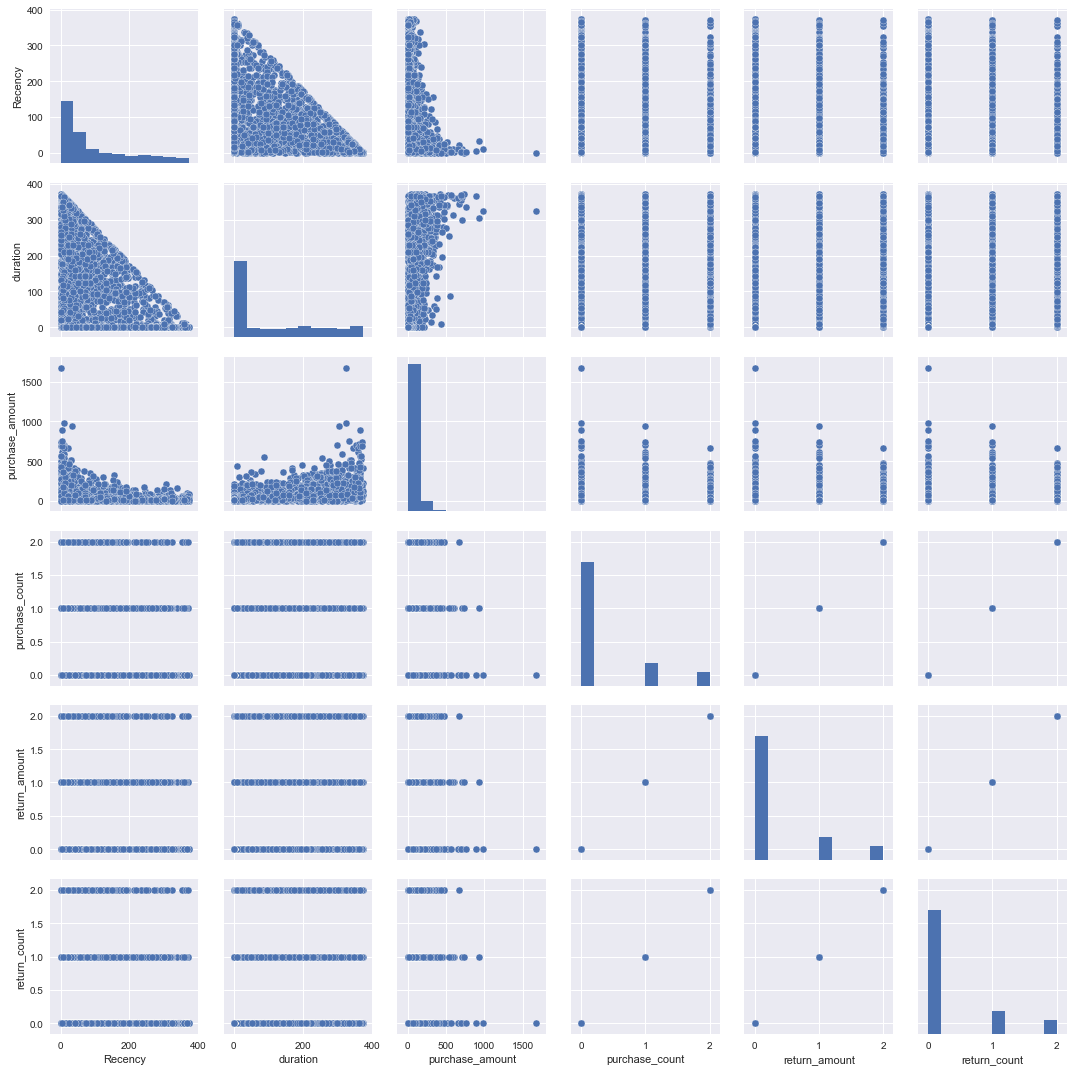

In [16]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D927BCA20>,
      dtype=object)

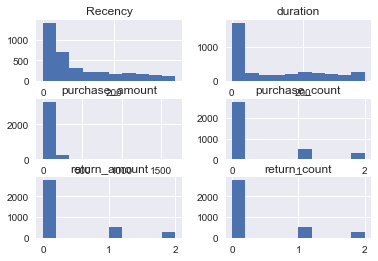

In [17]:
data.hist()

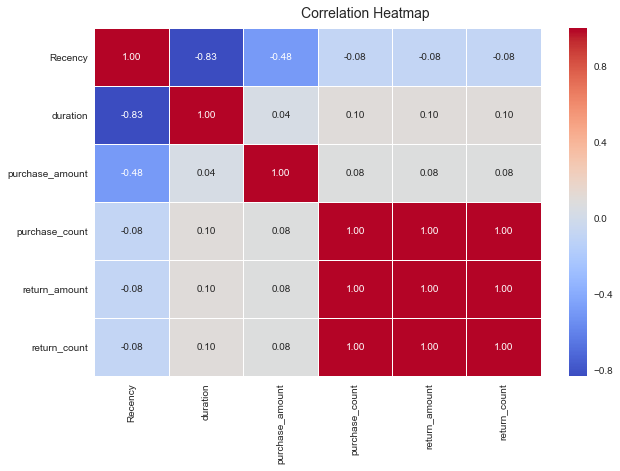

In [19]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = n_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

In [20]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal
    

In [22]:
from sklearn.cluster import KMeans

k, gapdf = optimalK(n_data, nrefs=5, maxClusters=25)
print ('Optimal k is: ', k)

Optimal k is:  24


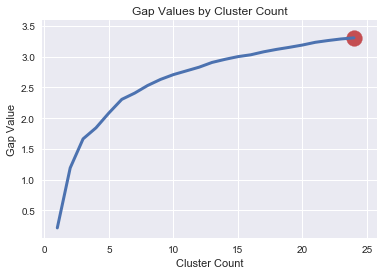

In [23]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

For K-means n_clusters = 2. The average silhouette_score is : 0.3920504138940615
For K-means n_clusters = 3. The average silhouette_score is : 0.3538728149553021
For K-means n_clusters = 4. The average silhouette_score is : 0.22227608083073644
For K-means n_clusters = 5. The average silhouette_score is : 0.17308096549152288
For K-means n_clusters = 6. The average silhouette_score is : 0.12418834668864494
For K-means n_clusters = 7. The average silhouette_score is : 0.07288823226032268
For K-means n_clusters = 8. The average silhouette_score is : 0.05849574552819875
For K-means n_clusters = 9. The average silhouette_score is : 0.05535489066805965
For K-means n_clusters = 10. The average silhouette_score is : 0.05073863069252045
For K-means n_clusters = 11. The average silhouette_score is : 0.03261605994228213
For K-means n_clusters = 12. The average silhouette_score is : 0.013351018651442222
For K-means n_clusters = 13. The average silhouette_score is : -0.0006984547247568227
For K-mean

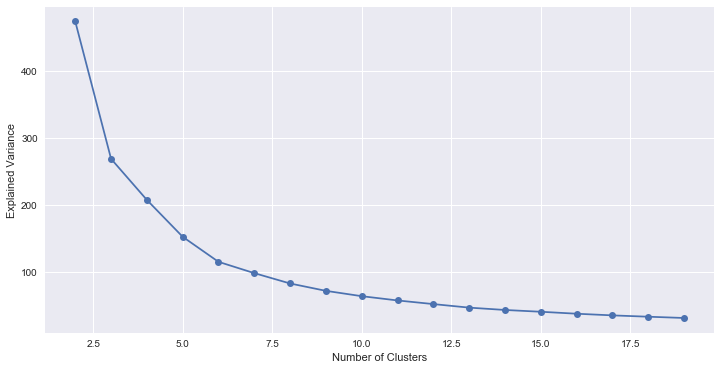

In [24]:
#Elbow method & silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Pretty display for notebooks
%matplotlib inline

cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(n_data)
    preds = clusters.predict(n_data)
    cluster_errors.append( clusters.inertia_ )
    score = silhouette_score(data, preds, metric='euclidean')
    print ("For K-means n_clusters = {}. The average silhouette_score is : {}".format(num_clusters, score))

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

plt.figure(figsize=(12,6))
plt.ylabel('Explained Variance')
plt.xlabel('Number of Clusters')
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

(array([608., 217., 146., 133., 147., 112., 170., 159., 122., 157., 161.,
         96., 110.]),
 array([0.        , 0.00076923, 0.00153846, 0.00230769, 0.00307692,
        0.00384615, 0.00461538, 0.00538462, 0.00615385, 0.00692308,
        0.00769231, 0.00846154, 0.00923077, 0.01      ]),
 <a list of 13 Patch objects>)

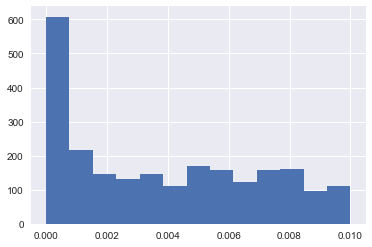

In [25]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=2, algorithm='kd_tree').fit(n_data)
#algorithm='ball_tree'
distances, indices = nbrs.kneighbors(n_data)
nn_distances=distances[:,1]

import numpy as np
import matplotlib.pyplot as plt

plt.hist(nn_distances,range=[0,.01], bins='auto')
#len(nn_distances[nn_distances<.0005])
#percent=(3500/4234)
#percent
#.0025


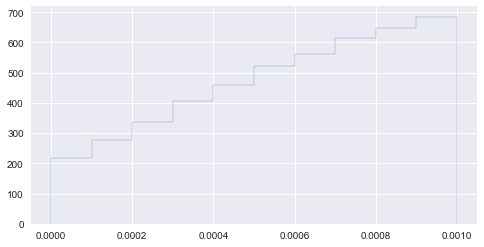

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(nn_distances, histtype='step',range=[0,.001], cumulative=True, label='Empirical')

# tidy up the figure
ax.grid(True)
plt.show()

In [27]:
from scipy import stats
stats.percentileofscore(nn_distances,.001)

19.08609640568403

In [29]:
from scipy import stats

##np.histogram(nn_distances)
#np.savetxt("nn_distances.csv", nn_distances, delimiter=",")
#stats.describe(nn_distances)

import numpy as np
import scipy.spatial as spatial

def getNeighborCount_spatial_cKDTree(data,k):
    neighorcount=0
    nn_minpoints=[]
    for observation in range(len(data)):
        point_tree = spatial.cKDTree(data)
        neighors_within_dist_k=point_tree.query_ball_point(data.loc[observation], k)
        neighorcount=len(neighors_within_dist_k)
        #data.loc[observation]['neighorcount'] =   neighorcount
        #display(neighorcount)
        #display(data.loc[observation])
        nn_minpoints.append(neighorcount)
        
    return nn_minpoints

n_data.assign(neighorcount=0)
nn_minpoints = getNeighborCount_spatial_cKDTree(n_data,.001)
#nn_minpoints=n_data.groupby("neighorcount").size()
nn_minpoints

[2,
 1,
 1,
 1,
 5,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 9,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 2,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 11,
 5,
 4,
 1,
 1,
 12,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 7,
 1,
 9,
 1,
 1,
 1,
 1,
 3,
 12,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 5,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 10,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 14,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 7,
 1,
 10,
 6,
 

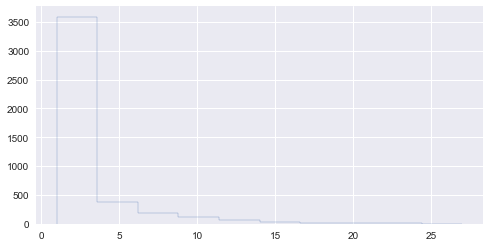

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(nn_minpoints, histtype='step', cumulative=-1, label='Empirical')

# tidy up the figure
ax.grid(True)
plt.show()

In [31]:
from scipy import stats
stats.percentileofscore(nn_minpoints,5)

92.65812203956534

In [32]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np


data = [go.Histogram(x=nn_distances,
                     cumulative=dict(enabled=True))]

py.iplot(data, filename='cumulative histogram')

# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns


# seaborn histogram
sns.distplot(nn_distances)


import seaborn as sns, numpy as np
sns.set(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

ImportError: No module named 'plotly'

#### plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()
